In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from datetime import datetime

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.figsize'] = (12, 8)

# Create output directory
output_dir = '../visualization_outputs'
os.makedirs(output_dir, exist_ok=True)

# Use colorblind-friendly palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Function to save plots
def save_plot(filename, formats=['pdf']):
    """Save current plot in specified format(s)"""
    for fmt in formats:
        filepath = os.path.join(output_dir, f'{filename}.{fmt}')
        plt.savefig(filepath, format=fmt, dpi=300, bbox_inches='tight', facecolor='white')
    print(f'Saved: {filename}.pdf')

# Load and clean data
hospitals = pd.read_csv("Hospital.csv")
h1 = hospitals[hospitals["Hospital"] == "hospital1"]
h2 = hospitals[hospitals["Hospital"] == "hospital2"]
h1.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4"], inplace=True, errors='ignore')
h2.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4"], inplace=True, errors='ignore')

/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_52615/361409593.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4"], inplace=True, errors='ignore')
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_52615/361409593.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4"], inplace=True, errors='ignore')


🚀 Creating Grouped Model F1 Score Analysis...
Saved: 00_overall_f1_scores_grouped_models.pdf


/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_52615/456567315.py:107: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_52615/361409593.py:30: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  plt.savefig(filepath, format=fmt, dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_52615/361409593.py:30: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  plt.savefig(filepath, format=fmt, dpi=300, bbox_inches='tight', facecolor='white')
/Users/ayu/PDF_benchmarking/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ayu/PDF_benchmarking/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128065 (\N{EYE}) missing from f

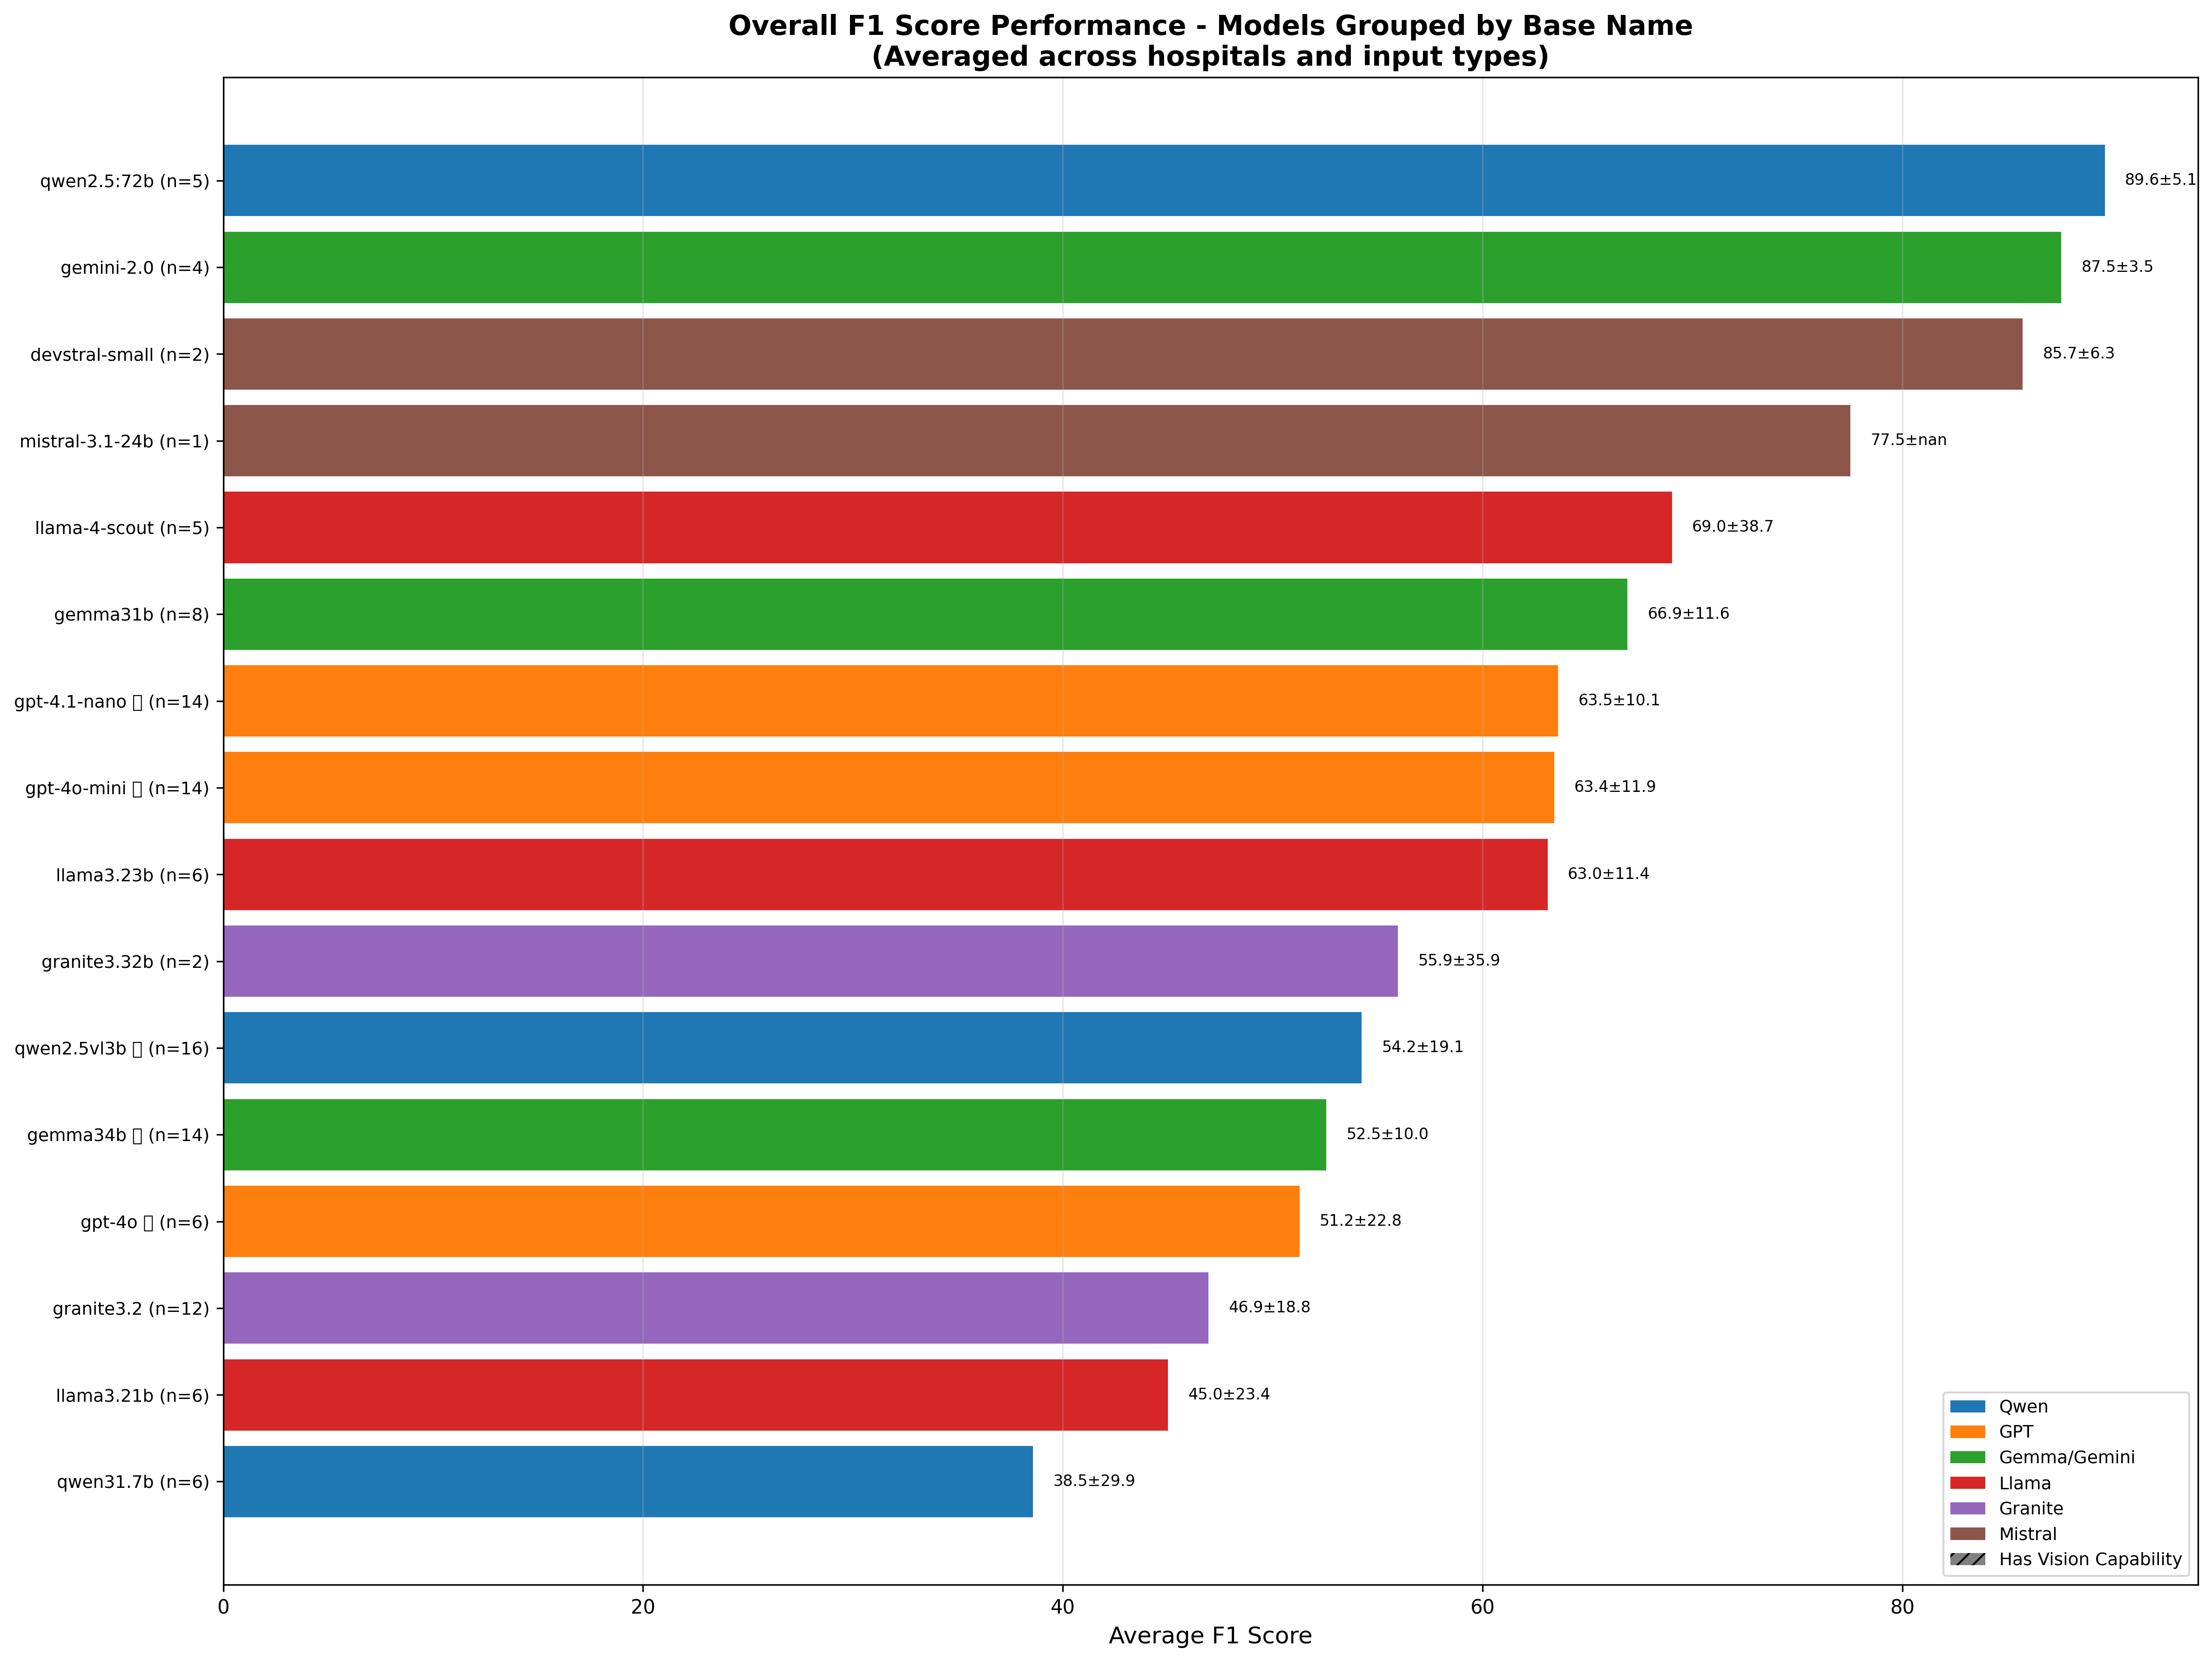


📊 Grouped Model F1 Score Statistics:
   • Unique Base Models: 16
   • Total Test Instances: 121
   • Best Performing Model: qwen2.5:72b (F1: 89.61)
   • Worst Performing Model: qwen31.7b (F1: 38.54)
   • Overall Average F1: 63.15
   • Models with Vision: 5

🏆 Top 5 Performers:
   • llama-4-scout (Llama, Text-only): F1 = 68.98 ± 38.73
   • mistral-3.1-24b (Mistral, Text-only): F1 = 77.48 ± nan
   • devstral-small (Mistral, Text-only): F1 = 85.69 ± 6.34
   • gemini-2.0 (Gemma/Gemini, Text-only): F1 = 87.53 ± 3.53
   • qwen2.5:72b (Qwen, Text-only): F1 = 89.61 ± 5.11

📉 Bottom 5 Performers:
   • qwen31.7b (Qwen, Text-only): F1 = 38.54 ± 29.88
   • llama3.21b (Llama, Text-only): F1 = 44.97 ± 23.45
   • granite3.2 (Granite, Text-only): F1 = 46.89 ± 18.80
   • gpt-4o (GPT, with Vision): F1 = 51.23 ± 22.82
   • gemma34b (Gemma/Gemini, with Vision): F1 = 52.50 ± 10.01


In [4]:
def normalize_model_name(llm_name):
    """Extract base model name by removing vision indicators and other suffixes"""
    # Remove vision input indicators
    base_name = llm_name.replace('*ImageInput*', '').strip()
    # Remove any trailing version numbers or suffixes that might vary
    base_name = base_name.replace('-qat', '').replace('-it', '').strip()
    return base_name

def get_model_family(llm_name):
    """Extract model family from LLM name"""
    llm_lower = llm_name.lower()
    if 'qwen' in llm_lower:
        return 'Qwen'
    elif 'llama' in llm_lower:
        return 'Llama'
    elif 'gpt' in llm_lower:
        return 'GPT'
    elif 'gemini' in llm_lower or 'gemma' in llm_lower:
        return 'Gemma/Gemini'
    elif 'granite' in llm_lower:
        return 'Granite'
    elif 'mistral' in llm_lower or 'devstral' in llm_lower:
        return 'Mistral'
    else:
        return 'Other'

def overall_metrics():
    """
    Create overall F1 score visualization for all models grouped by common base names
    This combines text/vision variants and averages across hospitals
    """
    # Combine all individual records from both hospitals
    all_individual = pd.concat([h1, h2], ignore_index=True)
    
    # Add normalized model names and families
    all_individual['Base_Model'] = all_individual['LLM'].apply(normalize_model_name)
    all_individual['Family'] = all_individual['LLM'].apply(get_model_family)
    all_individual['Is_Vision'] = all_individual['LLM'].str.contains('ImageInput', case=False)
    
    # Group by base model name and calculate average metrics
    grouped_models = all_individual.groupby('Base_Model').agg({
        'F1score': ['mean', 'std', 'count'],
        'Accuracy': 'mean',
        'Precision': 'mean',
        'Recall': 'mean',
        'Family': 'first',
        'Source': 'first',
        'Is_Vision': lambda x: any(x)  # True if any variant has vision
    }).round(2)
    
    # Flatten column names
    grouped_models.columns = ['F1_Mean', 'F1_Std', 'Count', 'Accuracy_Mean', 'Precision_Mean', 'Recall_Mean', 'Family', 'Source', 'Has_Vision']
    grouped_models = grouped_models.reset_index()
    
    # Sort by F1 score for visualization
    grouped_models_sorted = grouped_models.sort_values('F1_Mean', ascending=True)
    
    # Create the grouped bar plot
    plt.figure(figsize=(16, 12))
    bars = plt.barh(range(len(grouped_models_sorted)), grouped_models_sorted['F1_Mean'])
    
    # Color bars by model family
    family_colors = {
        'Qwen': colors[0],
        'GPT': colors[1], 
        'Gemma/Gemini': colors[2],
        'Llama': colors[3],
        'Granite': colors[4],
        'Mistral': colors[5],
        'Other': colors[6]
    }
    
    for i, (idx, row) in enumerate(grouped_models_sorted.iterrows()):
        bars[i].set_color(family_colors.get(row['Family'], colors[6]))
        # Add hatching for models with vision capabilities
        if row['Has_Vision']:
            bars[i].set_hatch('///')
    
    # Customize the plot
    model_labels = []
    for idx, row in grouped_models_sorted.iterrows():
        vision_indicator = ' 👁️' if row['Has_Vision'] else ''
        count_indicator = f' (n={int(row["Count"])})'
        label = f"{row['Base_Model']}{vision_indicator}{count_indicator}"
        model_labels.append(label)
    
    plt.yticks(range(len(grouped_models_sorted)), model_labels, fontsize=9)
    plt.xlabel('Average F1 Score', fontsize=12)
    plt.title('Overall F1 Score Performance - Models Grouped by Base Name\n(Averaged across hospitals and input types)', 
             fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(grouped_models_sorted.iterrows()):
        plt.text(row['F1_Mean'] + 1, i, f"{row['F1_Mean']:.1f}±{row['F1_Std']:.1f}", 
                va='center', fontsize=8)
    
    # Create legend for families
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, label=family) 
                      for family, color in family_colors.items() 
                      if family in grouped_models['Family'].values]
    # Add vision indicator to legend
    legend_elements.append(Patch(facecolor='gray', hatch='///', label='Has Vision Capability'))
    
    plt.legend(handles=legend_elements, loc='lower right', fontsize=9)
    plt.tight_layout()
    save_plot('00_overall_f1_scores_grouped_models')
    plt.show()
    
    # Print summary statistics
    print(f"\n📊 Grouped Model F1 Score Statistics:")
    print(f"   • Unique Base Models: {len(grouped_models)}")
    print(f"   • Total Test Instances: {grouped_models['Count'].sum()}")
    print(f"   • Best Performing Model: {grouped_models_sorted.iloc[-1]['Base_Model']} (F1: {grouped_models_sorted.iloc[-1]['F1_Mean']:.2f})")
    print(f"   • Worst Performing Model: {grouped_models_sorted.iloc[0]['Base_Model']} (F1: {grouped_models_sorted.iloc[0]['F1_Mean']:.2f})")
    print(f"   • Overall Average F1: {grouped_models['F1_Mean'].mean():.2f}")
    print(f"   • Models with Vision: {grouped_models['Has_Vision'].sum()}")
    
    # Show top 5 and bottom 5 performers
    print(f"\n🏆 Top 5 Performers:")
    for idx, row in grouped_models_sorted.tail(5).iterrows():
        vision_text = 'with Vision' if row['Has_Vision'] else 'Text-only'
        print(f"   • {row['Base_Model']} ({row['Family']}, {vision_text}): F1 = {row['F1_Mean']:.2f} ± {row['F1_Std']:.2f}")
    
    print(f"\n📉 Bottom 5 Performers:")
    for idx, row in grouped_models_sorted.head(5).iterrows():
        vision_text = 'with Vision' if row['Has_Vision'] else 'Text-only'
        print(f"   • {row['Base_Model']} ({row['Family']}, {vision_text}): F1 = {row['F1_Mean']:.2f} ± {row['F1_Std']:.2f}")
    
    return all_individual, grouped_models

# Execute the overall metrics function as the first visualization
print("🚀 Creating Grouped Model F1 Score Analysis...")
all_individual, grouped_models = overall_metrics()